# Week 5 handin

## 01 Assignment

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

## 02 Status
Jeg er blevet færdig med alle de obligatoriske opgaver.

## 03 Solution part 1

In [1]:
import requests

def download_csv_file_to_data(url, header_splitter, filename):
    try:
        response = requests.get(url)
        fname = response.headers[header_splitter].split('=')[1]
        fname = 'data/week5/'+filename+'.csv'

        if response.ok:
            with open(fname, 'wb') as f:
                f.write(response.content)
    except error:
        print("Something went wrong.", error)

In [2]:
def calc_percent_difference(new_value, old_value):
    return (((new_value-old_value) / old_value) * 100)

def calc_percent_of(new_value, old_value):
    return ((old_value/new_value) * 100)

In [3]:
def calc_two_matched_columns(df_1, df_2, column_name):
    data_list = []
    for i in range(0, len(df_1)):
        data_list.append([calc_percent_of(df_1[column_name][i], df_2[column_name][i])])
    return data_list

In [4]:
import pandas as pd
import numpy as np

# 1.1, 1.2, 1.3, 1.3.A, 1.3.B, 1.4
# 1.5.A - What is the change in pct of divorced danes from 2008 to 2020?

url_5a = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2020K1&CIVILSTAND=F"
filename_5a = "divorced"
download_csv_file_to_data(url_5a, 'Content-Disposition', filename_5a)


data_5a = pd.read_csv('data/week5/divorced.csv', delimiter=";")
data_5a_indhold = data_5a['INDHOLD']
percent = calc_percent_difference(data_5a_indhold[1], data_5a_indhold[0])

print("Exercise 1.5.A - Procent stigning:", percent)


Exercise 1.5.A - Procent stigning: 26.983845694672436


In [5]:
# 1.5.B - Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

# Download CSV for cities
url_5b_1 = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*"
filename_5b_1 = "cities"
download_csv_file_to_data(url_5b_1, 'Content-Disposition', filename_5b_1)

# Find 5 biggest cities
not_a_city = ['Hele landet', 'Region Hovedstaden', 'Region Midtjylland', 'Region Syddanmark', 'Region Sjælland', 
              'Region Nordjylland']
data_5b_1 = pd.read_csv('data/week5/cities.csv', delimiter=";")
data_5b_1 = data_5b_1.set_index('OMRÅDE').sort_values(by=['INDHOLD'], ascending=False)
five_biggest_cities = data_5b_1.drop(data_5b_1[data_5b_1.index.isin(not_a_city)].index)[:5]

# Download CSV for married status
url_5b_2 = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K4&CIVILSTAND=TOT%2CU&OMR%C3%85DE=*"
filename_5b_2 = "married_status"
download_csv_file_to_data(url_5b_2, 'Content-Disposition', filename_5b_2)

# Find 'Never Married' based on 5 biggest cities
data_5b_2 = pd.read_csv('data/week5/married_status.csv', delimiter=";")
data_5b_2 = data_5b_2.drop(data_5b_2[data_5b_2['OMRÅDE'].isin(five_biggest_cities.index) == False].index).set_index('OMRÅDE')
data_5b_2_halflength = int((len(data_5b_2)/2))
data_5b_2_all = data_5b_2.iloc[:data_5b_2_halflength, :]
data_5b_2_notmarried = data_5b_2.iloc[data_5b_2_halflength:, :]
never_married_percent = pd.DataFrame(index=data_5b_2_all.index, columns=['Percent'], 
                    data=calc_two_matched_columns(data_5b_2_all, data_5b_2_notmarried, 'INDHOLD')).sort_values(by='Percent', ascending=False)
print("Exercise 1.5.B - Procent aldrig gift af de 5 største byer:")
never_married_percent

Exercise 1.5.B - Procent aldrig gift af de 5 største byer:


,Percent
OMRÅDE,
København,65.489642
Aarhus,59.942282
Odense,55.196448
Aalborg,54.820118
Vejle,47.242961


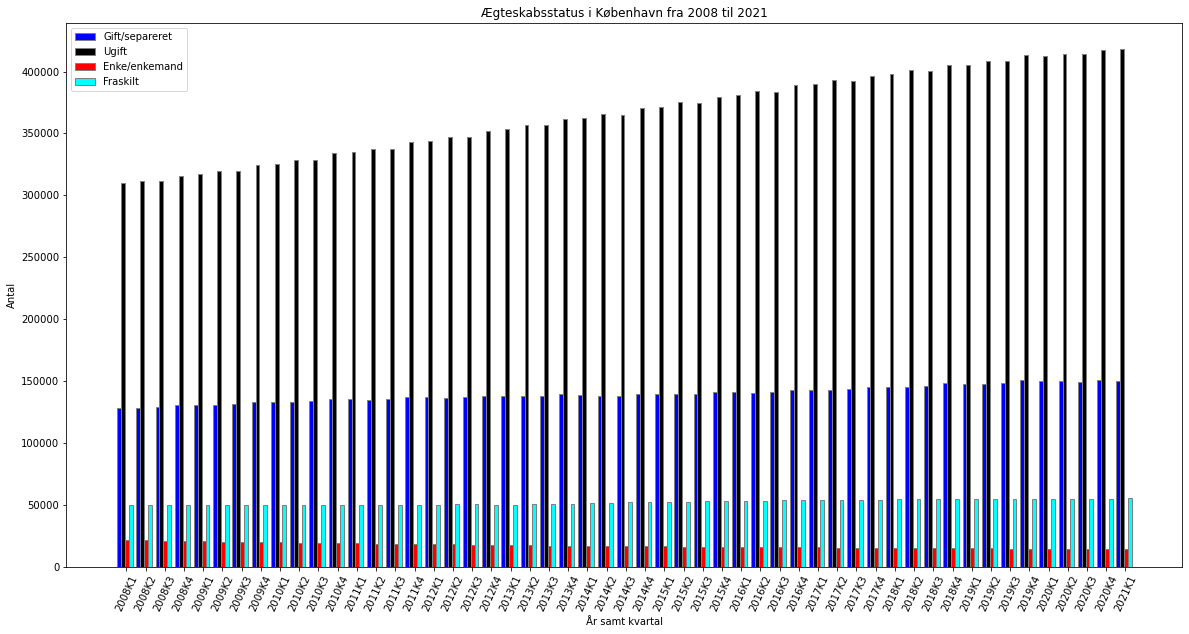

In [6]:
import matplotlib.pyplot as plt

# Exercise 1.5.C - Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

# Download CSV for marriage statuses
url_5c = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=*&CIVILSTAND=U%2CG%2CE%2CF&OMR%C3%85DE=101"
filename_5c = "marriage_status"
download_csv_file_to_data(url_5c, 'Content-Disposition', filename_5c)

# Create different DataFrames
sorting_dict = {'married': 'Gift/separeret', 'not_married': 'Ugift', 'widow': 'Enke/enkemand', 'divorced': 'Fraskilt'}
data_5c = pd.read_csv('data/week5/marriage_status.csv', delimiter=";")
data_5c_married = data_5c[data_5c['CIVILSTAND'] == sorting_dict['married']]
data_5c_notmarried = data_5c[data_5c['CIVILSTAND'] == sorting_dict['not_married']]
data_5c_widow = data_5c[data_5c['CIVILSTAND'] == sorting_dict['widow']]
data_5c_divorced = data_5c[data_5c['CIVILSTAND'] == sorting_dict['divorced']]

# Create bar chart
plt.figure(figsize=[20, 10])
length = len(list(data_5c_married['TID']))
x = np.arange(length)
plt.bar(x, list(data_5c_married['INDHOLD']), color = 'blue', edgecolor='grey', width = 0.2)
plt.bar(x + 0.2, list(data_5c_notmarried['INDHOLD']), color = 'black', edgecolor='grey', width = 0.2)
plt.bar(x + 0.4, list(data_5c_widow['INDHOLD']), color = 'red', edgecolor='grey', width = 0.2)
plt.bar(x + 0.6, list(data_5c_divorced['INDHOLD']), color = 'cyan', edgecolor='grey', width = 0.2)
plt.legend([sorting_dict['married'], sorting_dict['not_married'], sorting_dict['widow'], sorting_dict['divorced']])
plt.xticks([i + 0.375 for i in range(length)], list(data_5c_married['TID']), rotation=65)
plt.title("Ægteskabsstatus i København fra 2008 til 2021")
plt.xlabel("År samt kvartal")
plt.ylabel("Antal")
plt.show()

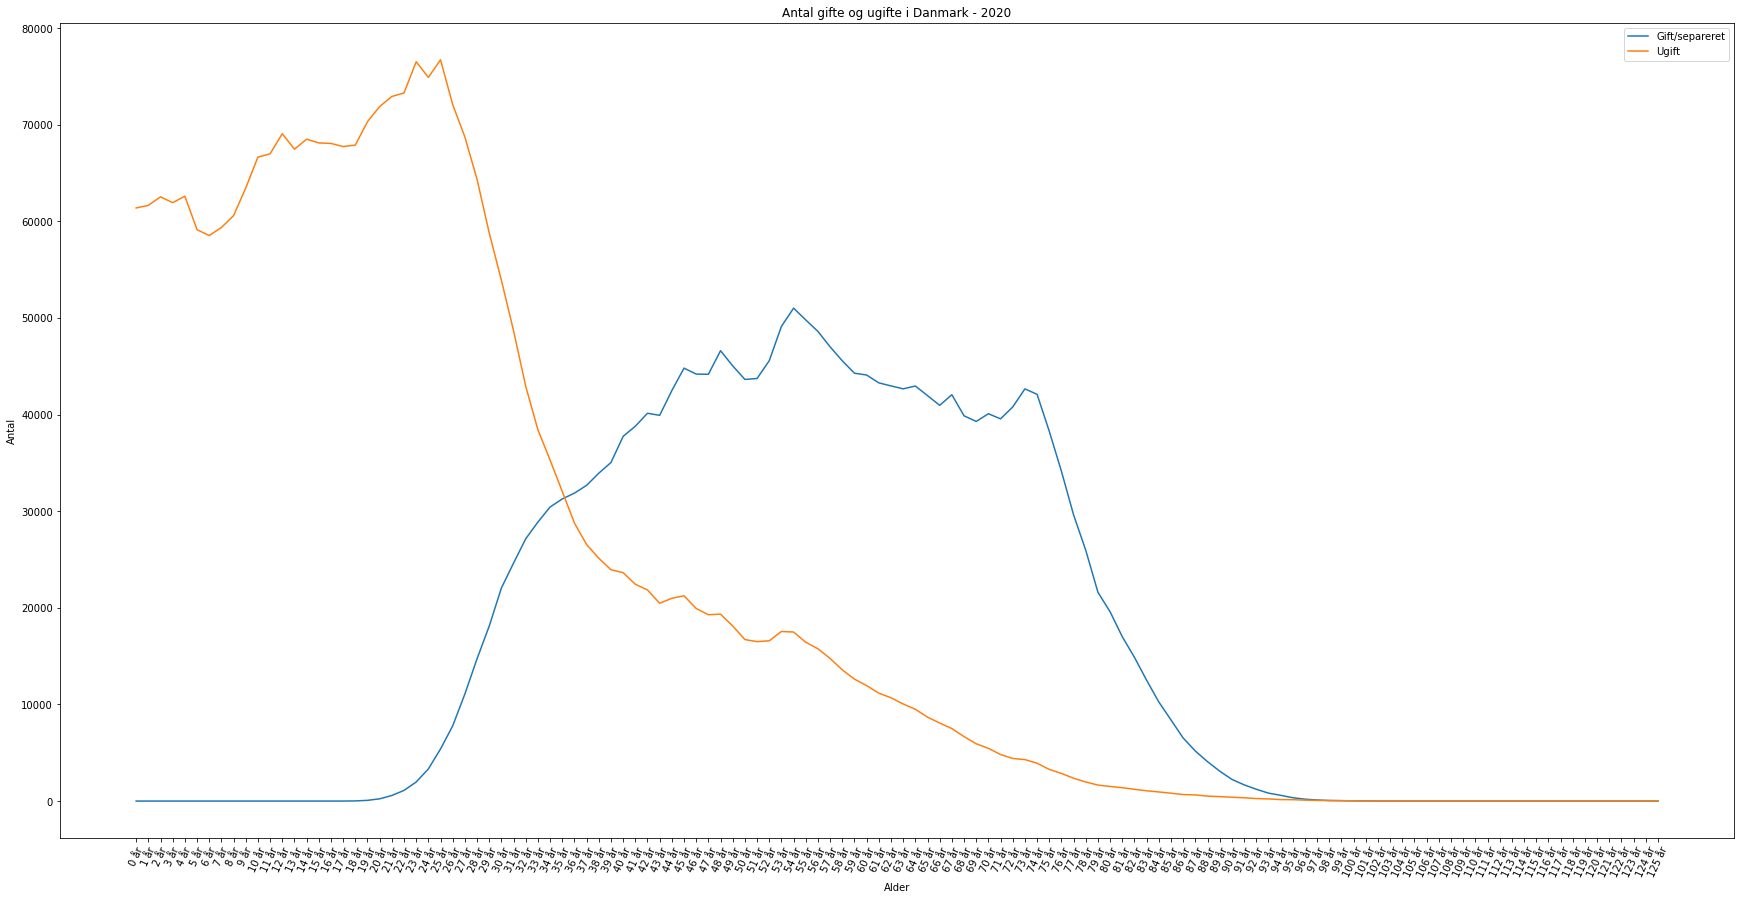

In [7]:
# Exercise 1.5.D - Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 
    # (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

# Download CSV for 'Married' and 'Never Married' statuses in 2020
url_5d = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*&CIVILSTAND=U%2CG&Tid=2020K4"
filename_5d = "marriage_status_2020"
download_csv_file_to_data(url_5d, 'Content-Disposition', filename_5d)

# Create different DataFrames; 'Married' and 'Never Married'
data_5d = pd.read_csv('data/week5/marriage_status_2020.csv', delimiter=";")
data_5d_married = data_5d[data_5d['CIVILSTAND'] == sorting_dict['married']]
data_5d_notmarried = data_5d[data_5d['CIVILSTAND'] == sorting_dict['not_married']]

# Create plot
# Using '[1:]' to prevent the 'I alt' data
plt.figure(figsize=[30, 15])
length = len(list(data_5d_married['ALDER'][1:]))
x = np.arange(length)
plt.plot(list(data_5d_married['ALDER'][1:]), list(data_5d_married['INDHOLD'][1:]))
plt.plot(list(data_5d_notmarried['ALDER'][1:]), list(data_5d_notmarried['INDHOLD'][1:]))
plt.legend([sorting_dict['married'], sorting_dict['not_married']])
plt.xticks(rotation=65)
plt.xlabel("Alder")
plt.ylabel("Antal")
plt.title('Antal gifte og ugifte i Danmark - 2020')
plt.show()